In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('/content/data_science_job.csv')

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [9]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [10]:
df.shape

(19158, 13)

In [11]:
df.isnull().mean()*100


enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [12]:
col=[x for x in df.columns if df[x].isnull().mean() < 0.05 and df[x].isnull().mean()>0]

In [13]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [14]:
df[col].sample(10)

,city_development_index,enrolled_university,education_level,experience,training_hours
16075,0.624,no_enrollment,Graduate,7.0,160.0
10593,0.920,no_enrollment,Graduate,11.0,46.0
17704,0.550,no_enrollment,Graduate,5.0,24.0
6297,0.727,no_enrollment,Graduate,12.0,70.0
15543,0.926,no_enrollment,Graduate,5.0,106.0
14272,0.848,Full time course,High School,3.0,22.0
11641,0.910,no_enrollment,Graduate,10.0,50.0
6322,0.920,Full time course,Graduate,2.0,336.0
8794,0.913,no_enrollment,Phd,20.0,70.0
5121,0.754,no_enrollment,Graduate,20.0,124.0


In [15]:
df[col].isna().sum()

city_development_index    479
enrolled_university       386
education_level           460
experience                 65
training_hours            766
dtype: int64

In [16]:
len(df[col].dropna())/len(df)*100

89.68577095730244

In [17]:
new=df[col].dropna()

In [18]:
df.shape

(19158, 13)

<Axes: xlabel='education_level', ylabel='count'>

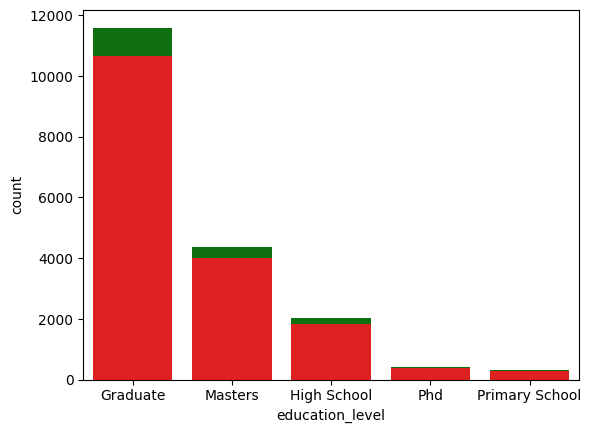

In [19]:
sns.countplot(data=df.reset_index(), x=df['education_level'],color='green')
sns.countplot(data=new.reset_index(), x=new['education_level'],color='red')


In [20]:
new.shape

(17182, 5)

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

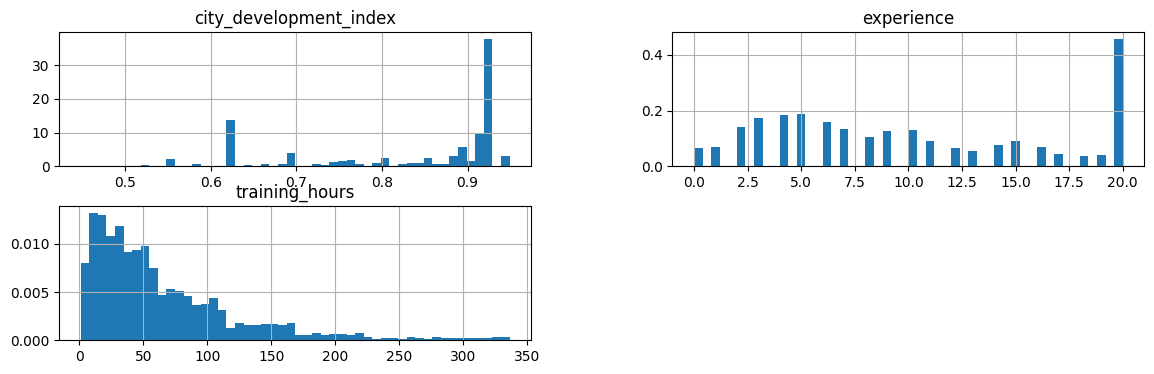

In [21]:
new.hist(bins=50,density=True,figsize=(14,4))

<Axes: >

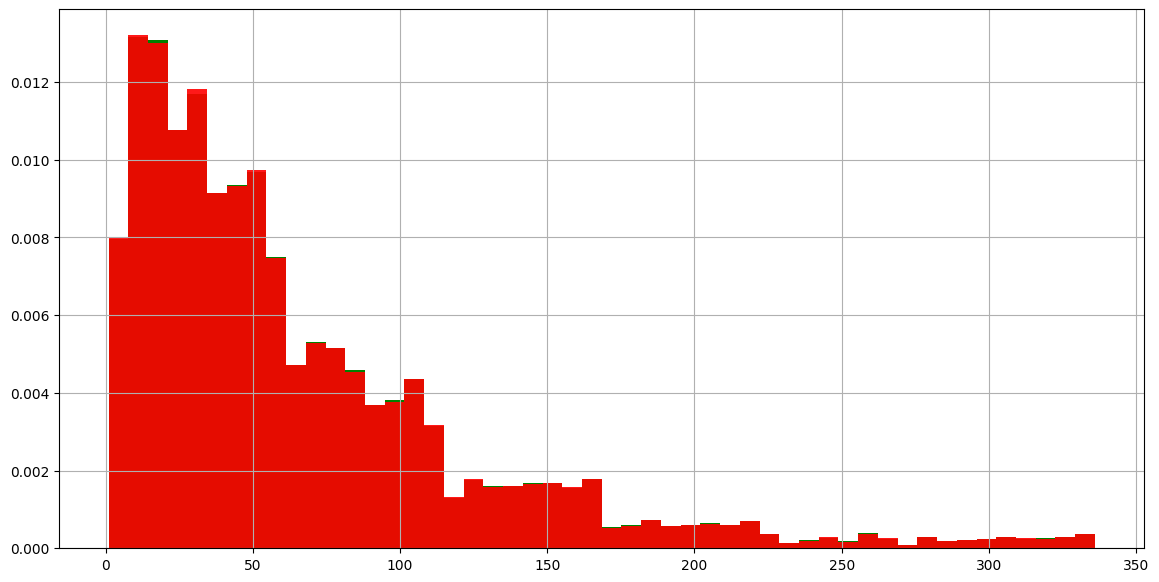

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure()
ax=fig.add_subplot(111)


df['training_hours'].hist(bins=50,density=True,ax=ax,color='green',figsize=(14,7))
new['training_hours'].hist(bins=50,density=True,ax=ax,color='red',alpha=0.9,figsize=(14,7))


<Axes: >

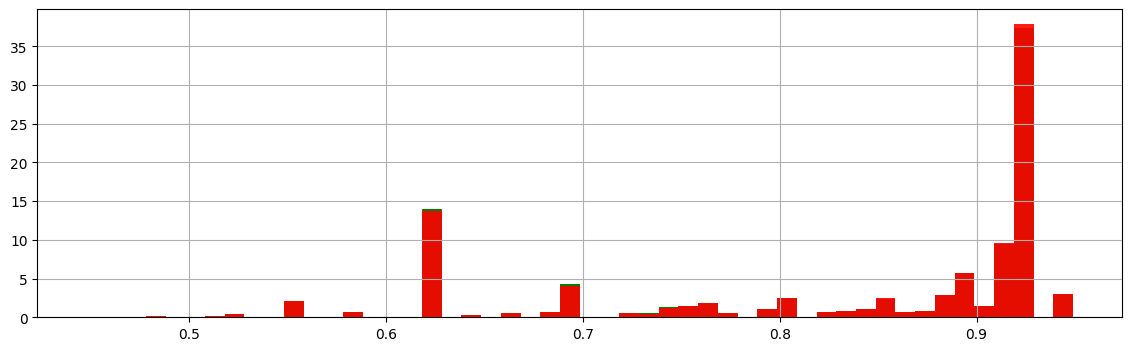

In [23]:


fig=plt.figure()
ax=fig.add_subplot(111)


df['city_development_index'].hist(bins=50,density=True,ax=ax,color='green',figsize=(14,4))
new['city_development_index'].hist(bins=50,density=True,ax=ax,color='red',alpha=0.9,figsize=(14,4))


<Axes: >

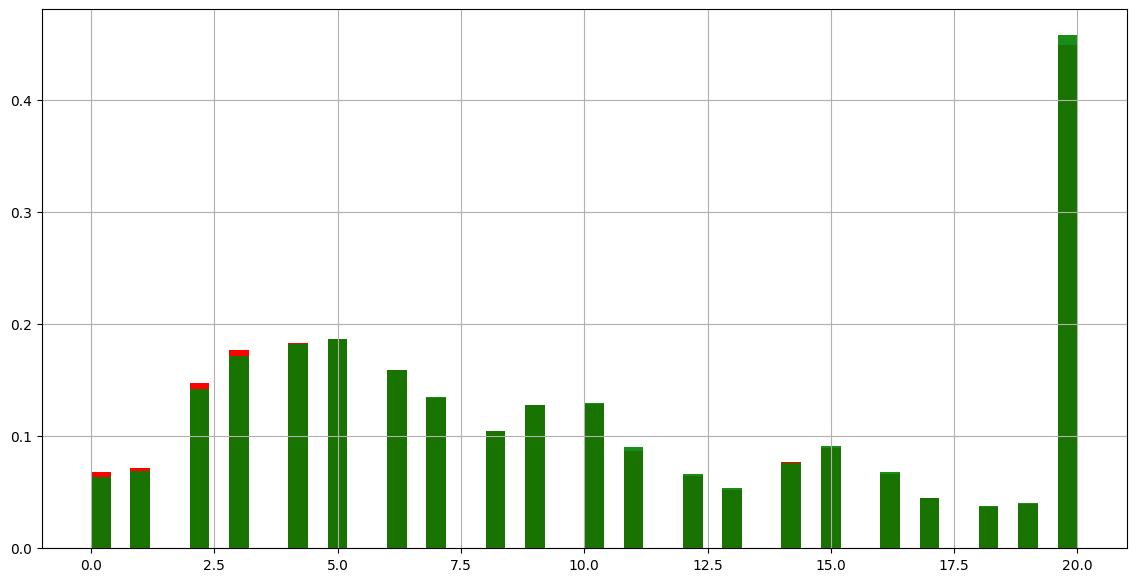

In [24]:


import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure()
ax=fig.add_subplot(111)


df['experience'].hist(bins=50,density=True,ax=ax,color='red',figsize=(14,7))
new['experience'].hist(bins=50,density=True,ax=ax,color='green',alpha=0.9,figsize=(14,7))


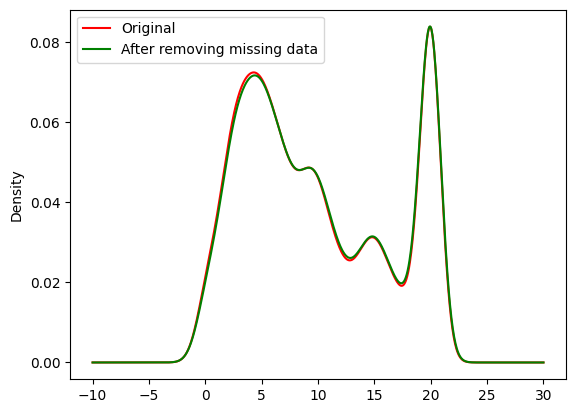

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the density for 'experience' in the original and new dataframes
df['experience'].plot.density(color='red', label='Original')
new['experience'].plot.density(color='green', label='After removing missing data')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [26]:
temp=pd.concat([

                df['enrolled_university'].value_counts()/len(df),

                new['enrolled_university'].value_counts()/len(df)
],axis=1)

temp.columns=['original','cca']

temp

,original,cca
no_enrollment,0.721213,0.659359
Full time course,0.196106,0.180029
Part time course,0.062533,0.057469


In [27]:
temp=pd.concat([

                df['education_level'].value_counts()/len(df),

                new['education_level'].value_counts()/len(df)
],axis=1)

temp.columns=['original','cca']

temp

,original,cca
Graduate,0.605387,0.555904
Masters,0.227633,0.209938
High School,0.105282,0.096304
Phd,0.021610,0.019835
Primary School,0.016077,0.014876
